# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


Team 47:
    
David Alexis García Espinosa

Juan Jose Garcia Juarez

Kevin Alan García Macías

Andrea Carolina Garza Nacif

Juan Carlos Garza Sánchez

In [677]:
# Importing NumPy for numerical operations, especially working with arrays and matrices
import numpy as np  

# Importing the string module for string operations and manipulation (useful for handling text data)
import string  

# Importing pandas for data manipulation, analysis, and handling DataFrames (tabular data)
import pandas as pd  

# Importing matplotlib's pyplot module for creating visualizations (e.g., plots and charts)

import matplotlib.pyplot as plt  

# Importing OpenCV (cv2) for image processing and computer vision tasks
import cv2 as cv  

# Importing the os module to interact with the operating system (e.g., file path manipulation, directory management)
import os  

# Enabling the autoreload extension to automatically reload modules before running code, useful during development
%load_ext autoreload  

# Setting the autoreload mode to automatically reload all modules when code is re-executed
%autoreload 2  

#################################

# Ensures that matplotlib plots are shown inline within Jupyter Notebook cells
%matplotlib inline  

# Importing seaborn module for creating visualizations (e.g., plots and charts)
import seaborn as sns

from sklearn.model_selection import train_test_split




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [678]:
# DATA_PATH = '/media/pepe/DataUbuntu/Databases/asl_data/'
DATA_PATH = '/Users/davidgarcia/Downloads/Advanced Machine Learning/Tarea 1/asl_data'
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [679]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [680]:
train_df['label'].nunique()

24

### Importar Images

In [681]:
y_train = np.array(train_df['label'])
y_val = np.array(valid_df['label'])
del train_df['label']
del valid_df['label']
x_train = train_df.values.astype(np.float32)
x_val = valid_df.values.astype(np.float32)

In [682]:
len(x_train)

27455

In [683]:
x_train.shape

(27455, 784)

In [684]:
x_val.shape

(7172, 784)

In [685]:
len(x_val)

7172

In [686]:
def split_valid_to_test(x_val, y_val, test_size=0.2, random_state=42):
    """
    Splits the validation set into a smaller validation set and a test set with the given test_size ratio.
    
    Parameters:
    - x_val: np.ndarray, features of the validation set
    - y_val: np.ndarray, labels of the validation set
    - test_size: float, proportion of the dataset to include in the test split (default is 0.2)
    - random_state: int, seed used by the random number generator (default is 42)
    
    Returns:
    - x_valid_new: np.ndarray, features of the new validation set
    - x_test: np.ndarray, features of the test set
    - y_valid_new: np.ndarray, labels of the new validation set
    - y_test: np.ndarray, labels of the test set
    """
    x_valid_new, x_test, y_valid_new, y_test = train_test_split(
        x_val, y_val, test_size=test_size, random_state=random_state
    )
    
    return x_valid_new, x_test, y_valid_new, y_test


In [687]:
x_valid, x_test, y_valid, y_test = split_valid_to_test(x_val, y_val)


In [688]:
### The following

alphabet=list(string.ascii_lowercase)
alphabet.remove('j')
alphabet.remove('z')
print(len(alphabet))

24


### Normalize

In [689]:
def normalize_min_max(x):
    '''
    Normalize the input features using Min-Max scaling.
    
    Parameters:
    - x: Feature array to normalize.
    
    Returns:
    - x_norm: Normalized feature array (values between 0 and 1).
    '''
    x_min = np.min(x, axis=0)  # Find the minimum values for each feature
    x_max = np.max(x, axis=0)  # Find the maximum values for each feature
    x_norm = (x - x_min) / (x_max - x_min + 1e-8)  # Normalize features to [0, 1] range
    
    return x_norm


In [690]:
# Normalize the training and validation sets
x_train = normalize_min_max(x_train)
x_val = normalize_min_max(x_val)
x_test = normalize_min_max(x_test)


### Graficar muestras

In [691]:
def plot_numerical_samples(x_train, num_samples=5):
    '''
    Plot samples of numerical data.
    
    Parameters:
    - x_train: Training feature set containing numerical data
    - num_samples: Number of samples to plot (default is 5)
    '''
    plt.figure(figsize=(10, 6))
    
    # Select random indices from the training set
    indices = np.random.choice(x_train.shape[0], num_samples, replace=False)
    
    for i, idx in enumerate(indices):
        plt.plot(x_train[idx], label=f'Sample {i+1}')
    
    plt.title('Numerical Data Samples')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')
    plt.legend()
    plt.show()

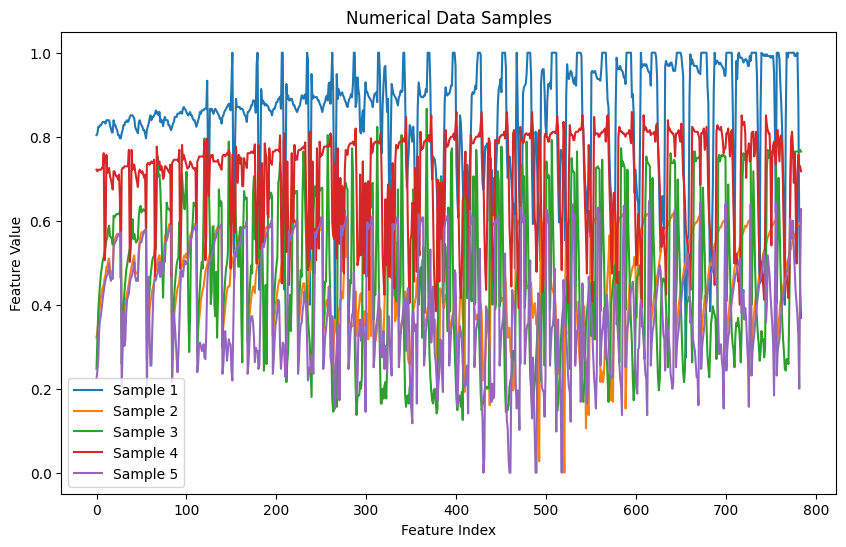

In [692]:
plot_numerical_samples(x_train, num_samples=5)

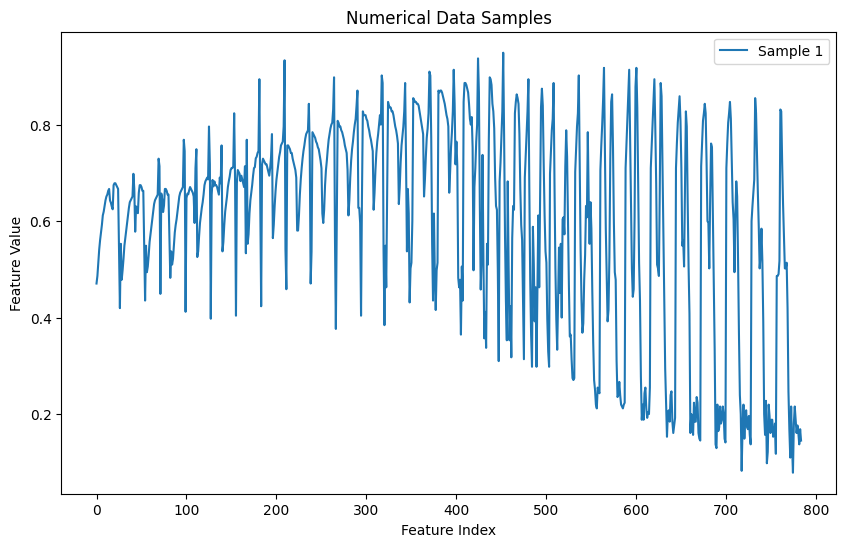

In [693]:
plot_numerical_samples(x_train, num_samples=1)

### Ecuaciones para nuestro modelo


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

# Deep Neural Network Model

This section explains the architecture of the neural network and the key mathematical operations involved in its forward propagation, activation functions, and cost function.

---

## 1. Forward Propagation

### First Layer Transformation

In the first layer of the network, we apply a linear transformation to the input data \( X \) using the weight matrix \( W^1 \) and bias \( b^1 \). This operation is represented by the following equation:

$$
z^1 = W^1 X + b^1
$$

Here:
- $W^1$ is the weight matrix for the first layer.
- $X$ is the input feature matrix.
- $b^1$ is the bias term.

### First Layer Activation Function

After calculating the linear transformation $z^1$, we apply the **ReLU (Rectified Linear Unit)** activation function to introduce non-linearity:

$$
a^1 = ReLU(z^1)
$$

ReLU is defined as:

$$
ReLU(z) = \max(0, z)
$$

This activation helps the network learn complex patterns by keeping positive values and setting negative values to zero.

---

## 2. Output Layer Transformation

In the second layer, we perform another linear transformation using the output of the first layer $a^1$, the weight matrix $W^2$, and bias $b^2$:

$$
z^2 = W^2 a^1 + b^2
$$

This layer will compute the scores (logits) before applying the final activation function.

---

## 3. Softmax Activation

For the final output, we apply the **softmax** function to convert the logits $z^2$ into probabilities $\hat{y}$. The softmax function is defined as:

$$
\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}
$$

Where:
- $\hat{y}$ represents the predicted probabilities for each class.
- $z^{2_k}$ is the logit for class $k$.
- The denominator is the sum of exponentiated logits across all classes $j$, ensuring that the output probabilities sum to 1.

---

## 4. Cost Function (Cross-Entropy Loss)

To measure how well the predicted output $\hat{y}$ matches the actual target $y$, we use the **cross-entropy loss function**. For a single example $i$, the loss function is:

$$
\mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^{i})
$$

Where:
- $\hat{y}^{i}$ is the predicted probability for the correct class.
- $y^{i}$ is the actual label (which is 1 for the correct class and 0 for all others).

The cross-entropy loss penalizes incorrect predictions and encourages the model to increase the probability of the correct class.

---

## 5. Cost Function Over All Examples

For a dataset containing multiple samples, the cost function becomes the average cross-entropy loss over all examples in the dataset. This is called the **cost function** $\mathcal{J}(w, b)$, and it is given by:

$$
\mathcal{J}(w, b) =  \frac{1}{\text{num\_samples}} \sum_{i=1}^{\text{num\_samples}}-\ln(\hat{y}^{i})
$$

Where:
- $\text{num\_samples}$ is the total number of training examples.
- $\hat{y}^{i}$ is the predicted probability for the correct class for each example.

The goal of training is to minimize this cost function by adjusting the weights $W$ and biases $b$

---

## 6. Summary of the Model

The neural network consists of the following key steps:
1. **Linear Transformation** in the first layer: 
   $$
   z^1 = W^1 X + b^1
   $$
2. **ReLU Activation**: 
   $$
   a^1 = ReLU(z^1)
   $$
3. **Linear Transformation** in the second layer: 
   $$
   z^2 = W^2 a^1 + b^2
   $$
4. **Softmax Activation** to get the output probabilities: 
   $$
   \hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}
   $$
5. **Cross-Entropy Loss** to measure prediction error: 
   $$
   \mathcal{L}(\hat{y}^{i}, y^{i}) = -\ln(\hat{y}^{i})
   $$
6. **Cost Function** to compute the average loss over all training examples: 
   $$
   \mathcal{J}(w, b) =  \frac{1}{\text{num\_samples}} \sum_{i=1}^{\text{num\_samples}} -\ln(\hat{y}^{i})
   $$

During training, the model updates the weights $W$ and biases $b$ to minimize the cost function using gradient descent or other optimization techniques.



### Funciones adicionales

## Mini-Batches

### Why Use Mini-Batches?

Instead of using the whole dataset in each training iteration, we divide the data into smaller **mini-batches**. This approach:
- Speeds up the computation of gradients (especially with large datasets).
- Reduces the variance in the gradient, leading to better convergence.
  
Mini-batches allow us to use algorithms like **Stochastic Gradient Descent (SGD)**, which is a more efficient version of gradient descent.

### Code for Mini-Batches

In [694]:
class np_tensor(np.ndarray): pass

'''
La clase np_tensor hereda de np.ndarray, que es la clase base de los arreglos en NumPy. 
Al heredar de np.ndarray, np_tensor tendrá todas las propiedades y métodos que posee un arreglo de NumPy. 
Esto significa que puedes realizar operaciones como la indexación, la suma de matrices, 
productos escalares, etc., con instancias de np_tensor como lo harías con cualquier arreglo de NumPy.
'''

In [695]:
def create_minibatches(mb_size, x, y, shuffle=True):
    '''
    Crea mini-lotes a partir de los datos de entrada x y las etiquetas y.
    
    Parámetros:
    - mb_size: Tamaño de cada mini-lote.
    - x: Datos de entrada (número de muestras, características).
    - y: Etiquetas (número de muestras, 1).
    - shuffle: Si es True, los datos se mezclarán aleatoriamente antes de dividirlos en mini-lotes.
    
    Retorna:
    - Un generador que produce tuplas (x_batch, y_batch) para cada mini-lote.
    '''
    
    # Verifica que el número de muestras en x y en y sea el mismo.
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'
    
    # Obtiene el número total de muestras en el conjunto de datos.
    total_data = x.shape[0]
    
    # Si shuffle es True, mezcla los datos aleatoriamente.
    if shuffle:
        idxs = np.arange(total_data)  # Crea un arreglo de índices desde 0 hasta total_data - 1.
        np.random.shuffle(idxs)  # Mezcla los índices aleatoriamente.
        x = x[idxs]  # Reordena los datos de entrada según los índices mezclados.
        y = y[idxs]  # Reordena las etiquetas de la misma manera.
    
    # Retorna un generador que divide los datos en mini-lotes de tamaño mb_size.
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))


## Nuestra clase Linear, ReLU y Sequential

###  Clase Linear

In [696]:
class Linear():
    def __init__(self, input_size, output_size):
        '''
        Inicializa los parámetros de la capa lineal utilizando la inicialización de Kaiming He.
        
        Parámetros:
        - input_size: Número de neuronas de entrada.
        - output_size: Número de neuronas de salida.
        '''
        # Inicializa la matriz de pesos W utilizando la inicialización Kaiming He.
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size / 2)).view(np_tensor)
        
        # Inicializa el vector de sesgos (bias) como ceros.
        self.b = (np.zeros((output_size, 1))).view(np_tensor)
        
    def __call__(self, X):
        '''
        Realiza la propagación hacia adelante a través de la capa lineal.
        
        Parámetros:
        - X: Tensor de entrada (datos).
        
        Retorna:
        - Z: La salida de la capa lineal, calculada como Z = W * X + b.
        '''
        Z = self.W @ X + self.b  # Calcula la salida lineal (producto matricial entre W y X más b).
        return Z
    def backward(self, X, Z):
        '''
        Realiza la retropropagación para calcular los gradientes de la capa lineal.
        
        Parámetros:
        - X: Entrada original de la capa durante el forward pass.
        - Z: Salida calculada de la capa durante el forward pass (con gradiente ya calculado).
        '''
        # Gradiente de la entrada X.
        X.grad = self.W.T @ Z.grad  # Calcula el gradiente con respecto a la entrada X.
        
        # Gradiente de los pesos W.
        self.W.grad = Z.grad @ X.T  # Calcula el gradiente con respecto a los pesos W.
        
        # Gradiente del sesgo b.
        self.b.grad = np.sum(Z.grad, axis=1, keepdims=True)  # Calcula el gradiente con respecto al sesgo b.



    

### Clase ReLU

In [697]:
class ReLU():
    def __call__(self, Z):
        '''
        Aplica la función de activación ReLU.
        
        Parámetros:
        - Z: Entrada a la función de activación (puede ser una matriz o un tensor).
        
        Retorna:
        - La salida de la función ReLU, que es el valor máximo entre 0 y Z.
        '''
        return np.maximum(0, Z)

    def backward(self, Z, A):
        '''
        Calcula los gradientes durante la retropropagación para la función ReLU.
        
        Parámetros:
        - Z: Entrada original antes de la función ReLU.
        - A: Salida después de la función ReLU (que incluye el gradiente con respecto a la siguiente capa).
        '''
        Z.grad = A.grad.copy()  # Inicializa el gradiente de Z con el gradiente que viene de la capa superior (A.grad).
        Z.grad[Z <= 0] = 0  # Aplica la derivada de ReLU: si Z <= 0, el gradiente es 0.


### Clase Sequential

In [698]:
class Sequential_layers():
    def __init__(self, layers):
        '''
        Inicializa la clase Sequential_layers.
        
        Parámetros:
        - layers: Lista que contiene las capas de la red, donde cada capa puede ser un objeto de tipo `Linear`, `ReLU`, etc.
        '''
        self.layers = layers  # Almacena las capas de la red.
        self.x = None  # Variable que almacenará los datos de entrada.
        self.outputs = {}  # Diccionario para almacenar las salidas intermedias de cada capa.

    def __call__(self, X):
        '''
        Ejecuta la propagación hacia adelante a través de todas las capas.
        
        Parámetros:
        - X: Datos de entrada (tensor de características).
        
        Retorna:
        - La salida final después de pasar por todas las capas.
        '''
        self.x = X  # Almacena los datos de entrada.
        self.outputs['l0'] = self.x  # Almacena las entradas originales como salida de la capa 0.
        
        # Propagación hacia adelante a través de cada capa en la red.
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)  # Pasa la entrada a través de la capa actual.
            self.outputs['l'+str(i)] = self.x  # Almacena la salida de la capa actual.
        
        return self.x  # Retorna la salida final.
    def backward(self):
        '''
        Ejecuta la retropropagación para calcular los gradientes en cada capa.
        '''
        # Itera sobre las capas en orden inverso (desde la última hasta la primera).
        for i in reversed(range(len(self.layers))):
            # Llama al método backward de cada capa, pasando las salidas de la capa anterior y la actual.
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)])
        
    
    def update(self, learning_rate=1e-3):
        '''
        Actualiza los pesos de las capas después de la retropropagación.
        
        Parámetros:
        - learning_rate: La tasa de aprendizaje para actualizar los pesos.
        '''
        for layer in self.layers:
            if isinstance(layer, ReLU): continue  # No actualiza los pesos para las capas ReLU.
            
            # Actualiza los pesos y los sesgos (bias) de las capas lineales.
            layer.W = layer.W - learning_rate * layer.W.grad  # Actualiza los pesos W.
            layer.b = layer.b - learning_rate * layer.b.grad  # Actualiza los sesgos b.
    
    def predict(self, X):
        '''
        Genera predicciones para las entradas dadas.
        
        Parámetros:
        - X: Datos de entrada.
        
        Retorna:
        - Las clases predichas (índice de la clase con la mayor probabilidad).
        '''
        return np.argmax(self.__call__(X))  # Ejecuta la propagación hacia adelante y retorna las predicciones.





### Cost Function

In [699]:
def softmaxXEntropy(x, y):
    """
    Calcula las probabilidades usando softmax y el costo usando entropía cruzada.
    
    Parámetros:
    - x: Puntuaciones (scores) obtenidas del modelo para el mini-lote actual.
    - y: Etiquetas verdaderas correspondientes al mini-lote.
    
    Retorna:
    - preds: Las probabilidades predichas para cada clase.
    - cost: El costo de entropía cruzada.
    """
    
    # Obtener el tamaño del mini-lote (batch size).
    batch_size = x.shape[1]  # La segunda dimensión de x es el número de ejemplos en el mini-lote.
    
    # Paso 1: Calcular las puntuaciones exponenciales para aplicar softmax.
    exp_scores = np.exp(x)  # Aplica la función exponencial a cada elemento de x.
    
    # Paso 2: Calcular las probabilidades de la clase mediante softmax.
    probs = exp_scores / exp_scores.sum(axis=0)  # Divide cada puntuación exponencial entre la suma de todas las puntuaciones (para cada ejemplo), obteniendo las probabilidades normalizadas.
    
    # Realiza una copia de las probabilidades para las predicciones.
    preds = probs.copy()  # `preds` es una copia de las probabilidades que se devolverá como predicciones.
    
    # Paso 3: Calcular el costo de entropía cruzada.
    # `y.squeeze()` elimina cualquier dimensión adicional de `y`, de modo que sea compatible con las operaciones posteriores.
    # `y_hat` son las probabilidades predichas correspondientes a las etiquetas correctas.
    y_hat = probs[y.squeeze(), np.arange(batch_size)]  # Selecciona las probabilidades correctas correspondientes a las etiquetas reales para cada ejemplo en el mini-lote.
    
    # Calcula el costo como el promedio de la entropía cruzada para el mini-lote.
    cost = np.sum(-np.log(y_hat)) / batch_size  # Aplica logaritmo negativo a las probabilidades correctas y luego promedia sobre el mini-lote.
    
    # Paso 4: Calcular los gradientes de la función de costo respecto a las puntuaciones originales (antes del softmax).
    probs[y.squeeze(), np.arange(batch_size)] -= 1  # Calcula la derivada de la pérdida con respecto a las puntuaciones `x`.
    
    # Asignar los gradientes a la variable `x.grad` para que se utilicen en la retropropagación.
    x.grad = probs.copy()  # Se asignan los gradientes calculados a `x.grad`.
    
    # Retorna las predicciones y el costo.
    return preds, cost


### Loop de entrenamiento

In [700]:
def train(model, epochs, mb_size=128, learning_rate=1e-3):
    """
    Función para entrenar un modelo de aprendizaje automático.

    Parámetros:
    - model: El modelo a entrenar.
    - epochs: Número de épocas de entrenamiento.
    - mb_size: Tamaño de los mini-lotes (por defecto 128).
    - learning_rate: Tasa de aprendizaje utilizada para actualizar los pesos del modelo (por defecto 1e-3).
    """
    
    # Bucle que se ejecuta por cada época de entrenamiento.
    for epoch in range(epochs):
        # Para cada mini-lote en el conjunto de entrenamiento, se realiza el proceso de entrenamiento.
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):
            
            # Paso 1: Realizar predicciones
            # El modelo predice las puntuaciones para las entradas `x` del mini-lote.
            # `x.T.view(np_tensor)` convierte los datos de entrada a la forma esperada por el modelo.
            scores = model(x.T.view(np_tensor))
            
            # Paso 2: Calcular el costo (pérdida)
            # Se utiliza la función `softmaxXEntropy` para calcular el costo o pérdida.
            # El primer valor (`_`) se ignora, el segundo valor es el costo.
            _, cost = softmaxXEntropy(scores, y)
            
            # Paso 3: Propagación hacia atrás
            # Se realiza la propagación hacia atrás para calcular los gradientes de los pesos del modelo.
            model.backward()
            
            # Paso 4: Actualización de los pesos
            # Los pesos del modelo se actualizan utilizando los gradientes y la tasa de aprendizaje.
            model.update(learning_rate)
        
        # Después de cada época, se imprime el costo final y la precisión en el conjunto de validación.
        print(f'costo: {cost}, accuracy: {accuracy(x_val, y_val, mb_size)}')


In [701]:
def accuracy(x, y, mb_size):
    """
    Función para calcular la precisión del modelo.
    
    Parámetros:
    - x: Datos de entrada.
    - y: Etiquetas reales correspondientes a los datos de entrada.
    - mb_size: Tamaño de los mini-lotes para procesar los datos en fragmentos más pequeños.
    
    Retorna:
    - La precisión del modelo (fracción de predicciones correctas).
    """
    correct = 0  # Inicializa el contador de predicciones correctas.
    total = 0  # Inicializa el contador del número total de predicciones.
    
    # Divide los datos en mini-lotes y realiza el proceso para cada mini-lote.
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        # Realiza la predicción del modelo para las entradas del mini-lote.
        # Se transpone `x` y se convierte a la forma esperada por el modelo (np_tensor).
        pred = model(x.T.view(np_tensor))  
        
        # Compara las predicciones con las etiquetas reales.
        # `np.argmax(pred, axis=0)` obtiene la clase predicha para cada ejemplo.
        # `y.squeeze()` elimina dimensiones adicionales de `y` para hacer compatible la comparación.
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())  
        
        # Acumula el número total de predicciones en el mini-lote.
        total += pred.shape[1]  
    
    # Calcula la precisión como la proporción de predicciones correctas sobre el total de predicciones.
    return correct / total


In [702]:
x_train.shape[0]

27455

In [703]:
y_train.shape[0]

27455

### Create your model and train it

In [704]:

# Definimos las dimensiones de entrada y salida
input_dim = x_train.shape[1]  # Número de características en x_train
output_dim = 24  # Número de clases (asumiendo 24 clases para el dataset ASL)

# Creamos el modelo secuencial con capas
model = Sequential_layers([
    Linear(input_dim, 128),  # Capa totalmente conectada con 128 neuronas
    ReLU(),  # Función de activación ReLU
    Linear(128, output_dim)  # Capa de salida con el número de clases
])

# Parámetros para el entrenamiento
epochs = 300
batch_size = 10
learning_rate = 0.001

# Entrenamos el modelo
costs = train(model, epochs, batch_size, learning_rate)


costo: 1.502005897423052, accuracy: 0.5029280535415505
costo: 0.4022347774269372, accuracy: 0.6192136084774121
costo: 0.5299729833129476, accuracy: 0.6473786949247072
costo: 0.36150439295052683, accuracy: 0.6625766871165644
costo: 0.15979122190426942, accuracy: 0.6639709983268266
costo: 0.3910410047269593, accuracy: 0.6674567763524819
costo: 0.19095740204074863, accuracy: 0.6882320133853876
costo: 0.021020865126170966, accuracy: 0.7367540435025097
costo: 0.06792233446175326, accuracy: 0.716675962074735
costo: 0.08182652693826267, accuracy: 0.7281093139988846
costo: 0.031528217601678135, accuracy: 0.7155605131065254
costo: 0.02195796412282868, accuracy: 0.711377579475739
costo: 0.16699783105317306, accuracy: 0.7285276073619632
costo: 0.02390779799254131, accuracy: 0.7339654210819855
costo: 0.026904292483627117, accuracy: 0.731037367540435
costo: 0.14666533444572166, accuracy: 0.7378694924707194
costo: 0.09215052439409269, accuracy: 0.7350808700501952
costo: 0.013112007335363916, accurac

### Test your model on Random data from your test set

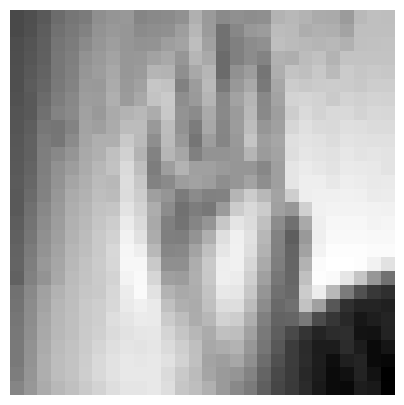

el valor predicho es: b el valor real es:b


In [711]:
def plot_number(image):
    plt.figure(figsize=(5,5))
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

idx = np.random.randint(len(y_test))
plot_number(x_test[idx].reshape(28,28))
pred = model.predict(x_test[idx].reshape(-1, 1))
print(f'el valor predicho es: {alphabet[pred]} el valor real es:{alphabet[y_test[idx]]}')